In [1]:
import numpy as np
from skimage import measure
import os
import pandas as pd
from at_synapse_detection import dataAccess as da
from at_synapse_detection import SynapseDetection as syn
from skimage import exposure
from skimage import color
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
fn_psd = '/Users/anish/Documents/yi_mice/2ss_stacks/F000/2ss_PSD.tif'
fn_synapsin = '/Users/anish/Documents/yi_mice/2ss_stacks/F000/2ss_Synap.tif'
fn_vglut1 = '/Users/anish/Documents/yi_mice/2ss_stacks/F000/2ss_VGluT1.tif'
fn_vglut2 = '/Users/anish/Documents/yi_mice/2ss_stacks/F000/2ss_VGluT2.tif'
fn_gephyrin = '/Users/anish/Documents/yi_mice/2ss_stacks/F000/2ss_Geph.tif'
fn_gad = '/Users/anish/Documents/yi_mice/2ss_stacks/F000/2ss_GAD.tif'
fn_dapi = '/Users/anish/Documents/yi_mice/2ss_stacks/F000/2ss_DAPIAligned.tif'
fn_gs = '/Users/anish/Documents/yi_mice/2ss_stacks/F000/2ss_GS.tif'

In [3]:
def colorize(image, hue, saturation=1,v=1):
    ### Add color of the given hue to an RGB greyscale image.
    hsv = color.rgb2hsv(image)
    hsv[:, :, 2] *= v
    hsv[:, :, 1] = saturation
    hsv[:, :, 0] = hue
    return color.hsv2rgb(hsv)

In [4]:
def setup_slice(fn, z): 
    
    vol = da.imreadtiff(fn)
    img = vol[:, :, z]
    p2, p98 = np.percentile(img, (5, 98)) #contrast stretching
    img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
    img_rgb = color.gray2rgb(img_rescale)
    
    return img_rgb

In [5]:
z = 22

In [6]:
red_hsv = [0, 100/100, 100/100]
green_hsv = [120/360, 100/100, 100/100]
magenta_hsv = [310/360, 100/100, 97/100]
blue_hsv = [240/360, 1, 1]
yellow_hsv = [60/360, 1, 1]
cyan_hsv = [180/360, 1, 1]

In [ ]:
psd_rgb = setup_slice(fn_psd, z)
synapsin_rgb = setup_slice(fn_synapsin, z)
dapi_rgb = setup_slice(fn_dapi, z)
gs_rgb = setup_slice(fn_gs, z)

psd_img = colorize(psd_rgb,green_hsv[0], green_hsv[1], green_hsv[2])
synapsin_img = colorize(synapsin_rgb, magenta_hsv[0], magenta_hsv[1], magenta_hsv[2])
gs_img = colorize(gs_rgb, blue_hsv[0], blue_hsv[1], blue_hsv[2])

combined_channels=np.nanmax([psd_img,synapsin_img,gs_img, dapi_rgb], axis=0)
maxints = tuple(np.nanmax(combined_channels[:,:,i]) for i in [0,1,2])

for i in [0,1,2]: 
    combined_channels[:,:,i]=exposure.rescale_intensity(combined_channels[:,:,i], 
                        out_range=(0, combined_channels[:,:,i].max()/np.nanmax(maxints)));

In [ ]:
# Excitatory Synapse Figure

In [ ]:
plt.figure()
plt.imshow(combined_channels[750:850, 870:990, :], interpolation='None')
plt.axis('off')
ax = plt.gca()
fontprops = fm.FontProperties(size=18)

scalebar = AnchoredSizeBar(ax.transData,
                           20, '2 $\mu m$', 'lower right', 
                           pad=0.5,
                           color='white',
                           frameon=False,
                           size_vertical=1, 
                          fontproperties=fontprops)

ax.add_artist(scalebar)
plt.savefig('figs/raw-data/excitatory_synapses.png', dpi=300, bbox_inches='tight')

In [ ]:
# Inhibitory with and without GS
# Gephyrin - Green
# Synapsin - Magenta
# GAD - Yellow
# DAPI - White
# GS - Blue

In [ ]:
# r100, c120

In [ ]:
gephyrin_rgb = setup_slice(fn_gephyrin, z)
synapsin_rgb = setup_slice(fn_synapsin, z)
dapi_rgb = setup_slice(fn_dapi, z)
gs_rgb = setup_slice(fn_gs, z)
gad_rbg = setup_slice(fn_gad, z)

gephyrin_img = colorize(gephyrin_rgb, green_hsv[0], green_hsv[1], green_hsv[2])
synapsin_img = colorize(synapsin_rgb, magenta_hsv[0], magenta_hsv[1], magenta_hsv[2])
gs_img = colorize(gs_rgb, blue_hsv[0], blue_hsv[1], blue_hsv[2])
gad_img = colorize(gs_rgb, cyan_hsv[0], cyan_hsv[1], cyan_hsv[2])

combined_channels=np.nanmax([gephyrin_img, synapsin_img, gs_img, dapi_rgb, gad_img], axis=0)

maxints = tuple(np.nanmax(combined_channels[:,:,i]) for i in [0,1,2])

for i in [0,1,2]: 
    combined_channels[:,:,i]=exposure.rescale_intensity(combined_channels[:,:,i], 
                        out_range=(0, combined_channels[:,:,i].max()/np.nanmax(maxints)));

In [ ]:
plt.figure()
plt.imshow(combined_channels[450:550, 200:320, :], interpolation='None')

plt.axis('off')
ax = plt.gca()
fontprops = fm.FontProperties(size=18)

scalebar = AnchoredSizeBar(ax.transData,
                           20, '2 $\mu m$', 'lower right', 
                           pad=0.5,
                           color='white',
                           frameon=False,
                           size_vertical=1, 
                          fontproperties=fontprops)

ax.add_artist(scalebar)
plt.savefig('figs/raw-data/inhibitory_synapses.png', dpi=300, bbox_inches='tight')

In [ ]:
# Excitatory with VGluT1
# PSD - Green
# Synapsin - Magenta
# DAPI - White
# GS - Blue
# VGLUT1 - Yellow
# VGLUT2 - Red

In [ ]:
psd_rgb = setup_slice(fn_psd, z)
synapsin_rgb = setup_slice(fn_synapsin, z)
dapi_rgb = setup_slice(fn_dapi, z)
gs_rgb = setup_slice(fn_gs, z)
vglut1_rgb = setup_slice(fn_vglut1, z)

psd_img = colorize(psd_rgb,green_hsv[0], green_hsv[1], green_hsv[2])
synapsin_img = colorize(synapsin_rgb, magenta_hsv[0], magenta_hsv[1], magenta_hsv[2])
gs_img = colorize(gs_rgb, blue_hsv[0], blue_hsv[1], blue_hsv[2])
vglut1_img = colorize(vglut1_rgb, cyan_hsv[0], cyan_hsv[1], cyan_hsv[2])

combined_channels=np.nanmax([psd_img, synapsin_img, gs_img, vglut1_img], axis=0)
maxints = tuple(np.nanmax(combined_channels[:,:,i]) for i in [0,1,2])

for i in [0,1,2]: 
    combined_channels[:,:,i]=exposure.rescale_intensity(combined_channels[:,:,i], 
                        out_range=(0, combined_channels[:,:,i].max()/np.nanmax(maxints)));

In [ ]:
plt.figure()
plt.imshow(combined_channels[410:510, 550:670, :], interpolation='None')

plt.axis('off')
ax = plt.gca()
fontprops = fm.FontProperties(size=18)

scalebar = AnchoredSizeBar(ax.transData,
                           20, '2 $\mu m$', 'lower right', 
                           pad=0.5,
                           color='white',
                           frameon=False,
                           size_vertical=1, 
                          fontproperties=fontprops)

ax.add_artist(scalebar)
plt.savefig('figs/raw-data/vglut1_synapses.png', dpi=300, bbox_inches='tight')

In [ ]:
# Excitatory with VGlut2
# PSD - Green
# Synapsin - Magenta
# DAPI - White
# GS - Blue
# VGLUT1 - Yellow
# VGLUT2 - Red

In [ ]:
psd_rgb = setup_slice(fn_psd, z)
synapsin_rgb = setup_slice(fn_synapsin, z)
dapi_rgb = setup_slice(fn_dapi, z)
gs_rgb = setup_slice(fn_gs, z)
vglut2_rgb = setup_slice(fn_vglut2, z)

psd_img = colorize(psd_rgb,green_hsv[0], green_hsv[1], green_hsv[2])
synapsin_img = colorize(synapsin_rgb, magenta_hsv[0], magenta_hsv[1], magenta_hsv[2])
gs_img = colorize(gs_rgb, blue_hsv[0], blue_hsv[1], blue_hsv[2])
vglut2_img = colorize(vglut2_rgb, cyan_hsv[0], cyan_hsv[1], cyan_hsv[2])

combined_channels=np.nanmax([psd_img, synapsin_img, gs_img, vglut2_img], axis=0)
maxints = tuple(np.nanmax(combined_channels[:,:,i]) for i in [0,1,2])

for i in [0,1,2]: 
    combined_channels[:,:,i]=exposure.rescale_intensity(combined_channels[:,:,i], 
                        out_range=(0, combined_channels[:,:,i].max()/np.nanmax(maxints)));

In [ ]:
plt.figure()
plt.imshow(combined_channels[440:540, 550:670, :], interpolation='None')
# plt.imshow(combined_channels)
plt.axis('off')
ax = plt.gca()
fontprops = fm.FontProperties(size=18)

scalebar = AnchoredSizeBar(ax.transData,
                           20, '2 $\mu m$', 'lower right', 
                           pad=0.5,
                           color='white',
                           frameon=False,
                           size_vertical=1, 
                          fontproperties=fontprops)

ax.add_artist(scalebar)
plt.savefig('figs/raw-data/vglut2_synapses.png', dpi=300, bbox_inches='tight')

In [7]:
psd_rgb = setup_slice(fn_psd, z)
synapsin_rgb = setup_slice(fn_synapsin, z)
dapi_rgb = setup_slice(fn_dapi, z)
gs_rgb = setup_slice(fn_gs, z)

psd_img = colorize(psd_rgb,green_hsv[0], green_hsv[1], green_hsv[2])
synapsin_img = colorize(synapsin_rgb, magenta_hsv[0], magenta_hsv[1], magenta_hsv[2])
gs_img = colorize(gs_rgb, blue_hsv[0], blue_hsv[1], blue_hsv[2])

combined_channels=np.nanmax([psd_img,synapsin_img,gs_img, dapi_rgb], axis=0)
maxints = tuple(np.nanmax(combined_channels[:,:,i]) for i in [0,1,2])

for i in [0,1,2]: 
    combined_channels[:,:,i]=exposure.rescale_intensity(combined_channels[:,:,i], 
                        out_range=(0, combined_channels[:,:,i].max()/np.nanmax(maxints)));

In [12]:
combined_channels.shape

(1040, 1388, 3)

In [17]:
500/700

0.7142857142857143

<IPython.core.display.Javascript object>


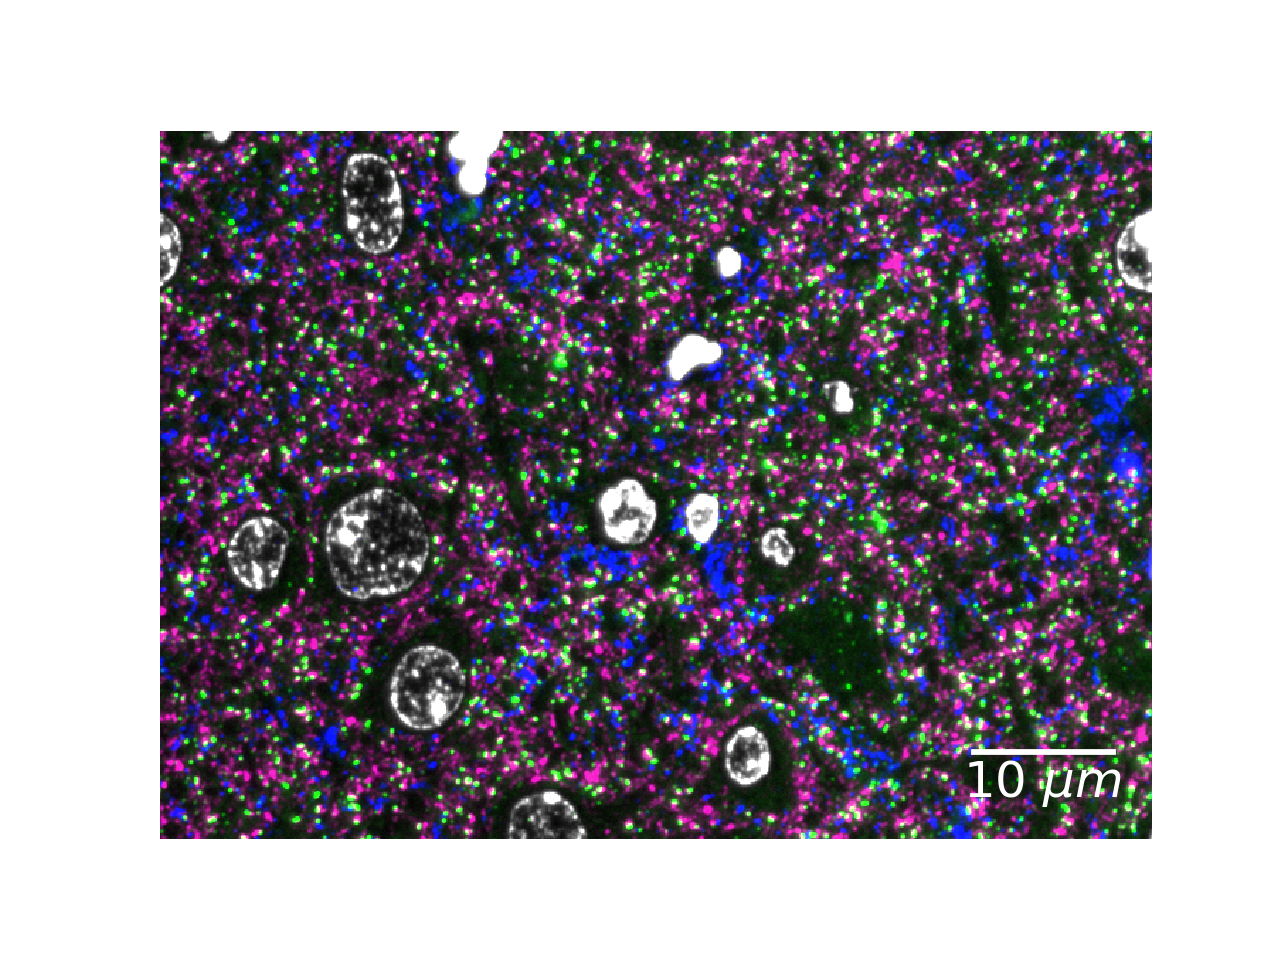

In [16]:
plt.figure()
plt.imshow(combined_channels[300:800, 500:1200, :], interpolation='None')
plt.axis('off')
ax = plt.gca()
fontprops = fm.FontProperties(size=18)

scalebar = AnchoredSizeBar(ax.transData,
                           100, '10 $\mu m$', 'lower right', 
                           pad=0.5,
                           color='white',
                           frameon=False,
                           size_vertical=2, 
                          fontproperties=fontprops)

ax.add_artist(scalebar)
plt.savefig('figs/raw-data/gs_large_overview.png', dpi=300, bbox_inches='tight')

In [26]:
100/(500/700)

140.0

<IPython.core.display.Javascript object>


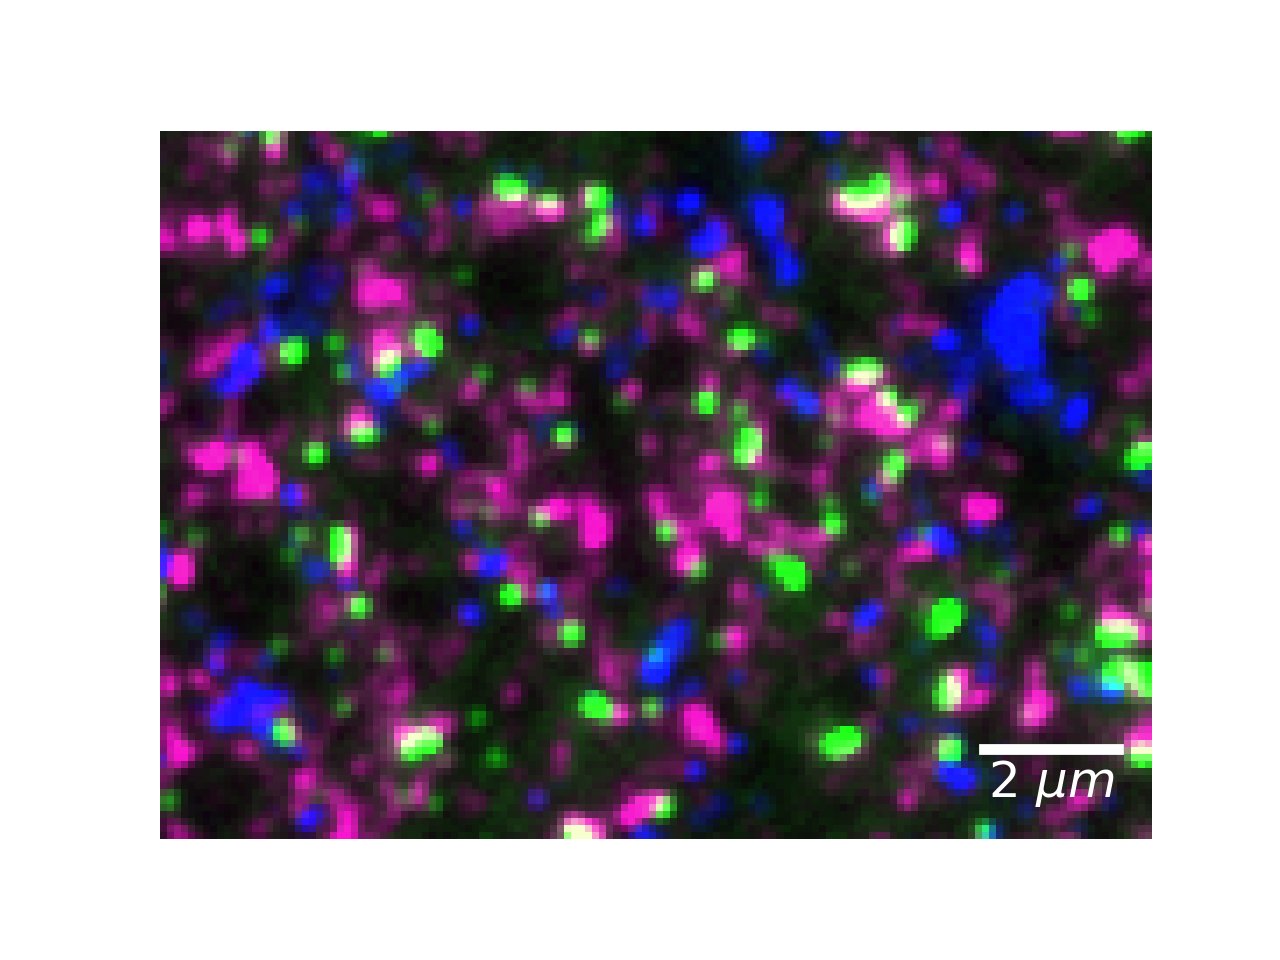

In [29]:
plt.figure()
plt.imshow(combined_channels[700:800, 500:640, :], interpolation='None')
plt.axis('off')
ax = plt.gca()
fontprops = fm.FontProperties(size=18)

scalebar = AnchoredSizeBar(ax.transData,
                           20, '2 $\mu m$', 'lower right', 
                           pad=0.5,
                           color='white',
                           frameon=False,
                           size_vertical=1, 
                          fontproperties=fontprops)

ax.add_artist(scalebar)
plt.savefig('figs/raw-data/gs_zoom_synapse.png', dpi=300, bbox_inches='tight')